<a href="https://colab.research.google.com/github/notnsas/cautious-eureka/blob/main/pemodelan/Mamdani_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fuzzy_expert

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00
  Created wheel for fuzzy_expert: filename=fuzzy_expert-0.1.0-py3-none-any.whl size=18505 sha256=8a3345a24a10af484631034a3d0e3797bbf3030281e19fce8dd09f106abc9e1a
  Stored in directory: /root/.cache/pip/wheels/64/80/25/7647a5db9d9cbe1ea2ea3494bb8303c02d9e2d2a314d76aa7a
Successfully built fuzzy_expert


In [ ]:
import os

os.chdir('/workspaces/fuzzy-expert')

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/fuzzy-expert'

In [3]:
import warnings

warnings.filterwarnings("ignore")

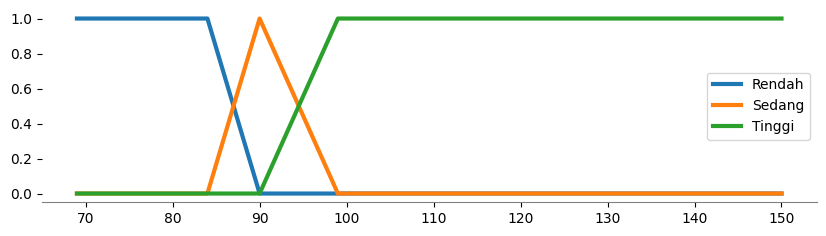

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable

variables = {
    "hip": FuzzyVariable(
        universe_range=(40, 150),
        terms={
            "Rendah": [(94, 1), (99, 0)],
            "Sedang": [(94, 0), (99, 1), (105, 0)],
            "Tinggi": [(99, 0), (105, 1)],
        },
    ),
    "abdomen": FuzzyVariable(
        universe_range=(69, 150),
        terms={
            "Rendah": [(84, 1), (90, 0)],
            "Sedang": [(84, 0), (90, 1), (99, 0)],
            "Tinggi": [(90, 0), (99, 1)],
        },
    ),
    "thigh": FuzzyVariable(
        universe_range=(47, 87),
        terms={
            "Rendah": [(56, 1), (59, 0)],
            "Sedang": [(56, 0), (59, 1), (62, 0)],
            "Tinggi": [(59, 0), (62, 1)],
        },
    ),
    "body_fat": FuzzyVariable(
        universe_range=(0, 50),
        terms={
            "Rendah": [(10, 1), (19, 0)],
            "Sedang": [(10, 0), (19, 1), (28, 0)],
            "Tinggi": [(19, 0), (28, 1)],
        },
    ),

}

plt.figure(figsize=(10, 2.5))
# variables["Banyak Pakaian"].plot()
# variables["kekotoran"].plot()
variables["abdomen"].plot()


In [8]:
from fuzzy_expert.rule import FuzzyRule

rules = [
    FuzzyRule(
        premise=[
            ("hip", "Rendah"),
            ("AND", "abdomen", "Rendah"),
            ("AND", "thigh", "Rendah"),
        ],
        consequence=[("body_fat", "Rendah")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Rendah"),
            ("AND", "abdomen", "Rendah"),
            ("AND", "thigh", "Sedang"),
        ],
        consequence=[("body_fat", "Rendah")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Rendah"),
            ("AND", "abdomen", "Rendah"),
            ("AND", "thigh", "Tinggi"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Rendah"),
            ("AND", "abdomen", "Sedang"),
            ("AND", "thigh", "Rendah"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Rendah"),
            ("AND", "abdomen", "Tinggi"),
            ("AND", "thigh", "Rendah"),
        ],
        consequence=[("body_fat", "T")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Rendah"),
            ("AND", "abdomen", "Sedang"),
            ("AND", "thigh", "Sedang"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Rendah"),
            ("AND", "abdomen", "Sedang"),
            ("AND", "thigh", "Tinggi"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Rendah"),
            ("AND", "abdomen", "Tinggi"),
            ("AND", "thigh", "Sedang"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Rendah"),
            ("AND", "abdomen", "Tinggi"),
            ("AND", "thigh", "Tinggi"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Sedang"),
            ("AND", "abdomen", "Rendah"),
            ("AND", "thigh", "Rendah"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Sedang"),
            ("AND", "abdomen", "Rendah"),
            ("AND", "thigh", "Sedang"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Sedang"),
            ("AND", "abdomen", "Rendah"),
            ("AND", "thigh", "Tinggi"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Sedang"),
            ("AND", "abdomen", "Sedang"),
            ("AND", "thigh", "Rendah"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Sedang"),
            ("AND", "abdomen", "Sedang"),
            ("AND", "thigh", "Sedang"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Sedang"),
            ("AND", "abdomen", "Sedang"),
            ("AND", "thigh", "Tinggi"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Sedang"),
            ("AND", "abdomen", "Tinggi"),
            ("AND", "thigh", "Rendah"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Sedang"),
            ("AND", "abdomen", "Tinggi"),
            ("AND", "thigh", "Sedang"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Sedang"),
            ("AND", "abdomen", "Tinggi"),
            ("AND", "thigh", "Tinggi"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Tinggi"),
            ("AND", "abdomen", "Rendah"),
            ("AND", "thigh", "Rendah"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Tinggi"),
            ("AND", "abdomen", "Rendah"),
            ("AND", "thigh", "Sedang"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Tinggi"),
            ("AND", "abdomen", "Rendah"),
            ("AND", "thigh", "Tinggi"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Tinggi"),
            ("AND", "abdomen", "Sedang"),
            ("AND", "thigh", "Rendah"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Tinggi"),
            ("AND", "abdomen", "Sedang"),
            ("AND", "thigh", "Sedang"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Tinggi"),
            ("AND", "abdomen", "Sedang"),
            ("AND", "thigh", "Tinggi"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Tinggi"),
            ("AND", "abdomen", "Tinggi"),
            ("AND", "thigh", "Rendah"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Tinggi"),
            ("AND", "abdomen", "Tinggi"),
            ("AND", "thigh", "Sedang"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
    FuzzyRule(
        premise=[
            ("hip", "Tinggi"),
            ("AND", "abdomen", "Tinggi"),
            ("AND", "thigh", "Tinggi"),
        ],
        consequence=[("body_fat", "Sedang")],
    ),
]
]

print(rules[0])
print()
print(rules[1])

SyntaxError: invalid syntax (ipython-input-8-942029658.py, line 1)

In [ ]:
from fuzzy_expert.inference import DecompositionalInference

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

model(
    variables=variables,
    rules=rules,
    banyak_pakaian=50,
    kekotoran=58,
)

({'putaran': np.float64(782.6128545848419)}, np.float64(1.0))

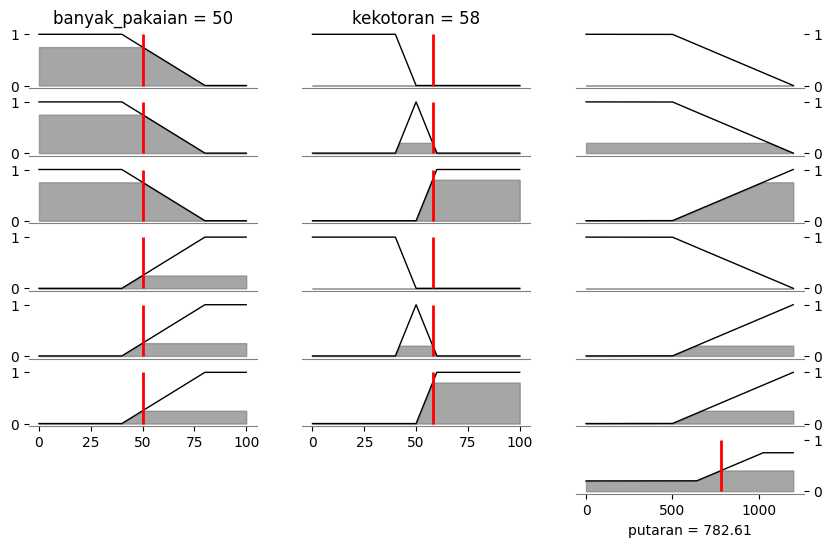

In [ ]:
plt.figure(figsize=(10, 6))
model.plot(
    variables=variables,
    rules=rules,
    banyak_pakaian=50,
    kekotoran=58,
)

In [ ]:
# from ipywidgets import interact, widgets

# def demo(`banyak_pakaian, kekotoran):
#     plt.figure(figsize=(10,6))
#     model.plot(
#         variables=variables,
#         rules=rules,
#         banyak_pakaian=banyak_pakaian,
#         kekotoran=kekotoran,
#     )

# interact(
#     demo,
#     banyak_pakaian=widgets.FloatSlider(min=0, max=100),
#     kekotoran=widgets.FloatSlider(min=0, max=100),
# )